# Introduction

## Purpose of the project

In [1]:
#TODO: Trasforma in piu sintetico

# The Dataset

1. Popularity &rarr; minmax of the metric provided by the `Spotify API`
2. Critic Score &rarr; augmented knowledge, scaling of the position in RYM ranking made in excel

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values *above 0.5* are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* **liveness**:
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value *above 0.8* provides strong likelihood that the track is live.

* **speechiness**:
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values *above 0.66* describe tracks that are probably made entirely of spoken words. Values *between 0.33 and 0.66* describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values *below 0.33* most likely represent music and other non-speech-like tracks.

* **valence**:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with *high valence* sound *more positive* (e.g. happy, cheerful, euphoric), while tracks with *low valence* sound *more negative* (e.g. sad, depressed, angry).

* **tempo**:
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

In [2]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sep = ";"
sns.set_palette("Set2") # set seaborn color palette
pal = sns.color_palette('Set2') # get colors for highlighting the quantiles

In [3]:
df = pd.read_csv('data.csv',sep=sep)

In [4]:
df.head() # inspecting the data

,track_name,artists,album,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,popularity,year,ranking,critic score,popularity_normalized
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,5,-6.975,1,0.0342,0.724000,...,0.1050,0.672,124.895,153867,4,60,2012,1,1,"0,6125"
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,6,-9.853,0,0.0320,0.156000,...,0.0479,0.334,115.876,175787,4,51,2012,1,1,"0,5"
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,11,-13.351,0,0.0962,0.654000,...,0.0937,0.663,148.282,622000,4,63,1965,2,"0,997995992","0,65"
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,6,-11.644,0,0.0345,0.316000,...,0.1100,0.190,102.026,356333,4,67,2000,3,"0,995991984","0,7"
4,when you sleep,my bloody valentine,loveless,0.399,0.866,6,-9.720,1,0.0558,0.000034,...,0.0785,0.125,128.864,251947,4,62,1991,4,"0,993987976","0,6375"


Dropping columns which are not useful to our analysis

In [5]:
df = df.drop(['time_signature','mode','key','liveness','popularity','ranking'],axis=1)

## Pre-processing columns

In this section we prepare the columns `year` and `duration_ms` for discretization

* **year**: Convert release date to the decade the album was released in order to discretize the value in order to obtain the **'decade'** column.

In [6]:
df['decade'] = (10 * (df['year'] // 10)) 

In [7]:
#Printing the min and max values of Release date in order to better discretize the release date 
# column
print(np.min(df['decade']), np.max(df['decade']))

1920 2020


### Approximate duration into minutes

* **duration_ms**: Through a helper function we convert duration_ms into **'duration_min '**
 


The get_min function takes as input an int value in milliseconds and converts it into an integer
that corresponds to the nearest minute. For example, that means that if a duration in milliseconds 
is equal 3 minutes and 30 seconds it is approximated to the nearest minute which is 4.



In [8]:
def get_min(ms):
    minutes=float(ms/float(1000*60))%60.
    return int((round(minutes,0)))

In [9]:
print(get_min(210000),'minutes') # 210000 milliseconds is equal to 3 minutes and 30 seconds
print(get_min(209000),'minutes') # 209000 milliseconds is equal to 3 minutes and 29 seconds

4 minutes
3 minutes


In [10]:
df['duration_min'] = df['duration_ms'].apply(lambda x: get_min(x)) # use apply function to use the get min function on every row of the get_min column

In [11]:
# drop rows with songs that are too long
df1 = df.drop(df[df.duration_min > 15].index,axis=0) 

In [12]:
# Remove live songs
df2=df1.drop(df1[df1['album'].str.contains("live", case=False)].index,axis=0)

In [13]:
df2.head()

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,duration_ms,year,critic score,popularity_normalized,decade,duration_min
0,Wouldn't It Be Nice,The Beach Boys,Greatest Hits,0.385,0.657,-6.975,0.0342,0.724000,0.000000,0.672,124.895,153867,2012,1,"0,6125",2010,3
1,God Only Knows,The Beach Boys,50 Big Ones: Greatest Hits,0.433,0.469,-9.853,0.0320,0.156000,0.000000,0.334,115.876,175787,2012,1,"0,5",2010,3
2,Sinnerman,Nina Simone,Pastel Blues,0.436,0.543,-13.351,0.0962,0.654000,0.000009,0.663,148.282,622000,1965,"0,997995992","0,65",1960,10
3,How to Disappear Completely,Radiohead,Kid A,0.167,0.302,-11.644,0.0345,0.316000,0.797000,0.190,102.026,356333,2000,"0,995991984","0,7",2000,6
4,when you sleep,my bloody valentine,loveless,0.399,0.866,-9.720,0.0558,0.000034,0.738000,0.125,128.864,251947,1991,"0,993987976","0,6375",1990,4


In [14]:
df2=df2.drop(["duration_ms","year"],axis=1) # drop columns which are no longer useful 

In [15]:
df2.dtypes #check if all data datatypes are ok

track_name                object
artists                   object
album                     object
danceability             float64
energy                   float64
loudness                 float64
speechiness              float64
acousticness             float64
instrumentalness         float64
valence                  float64
tempo                    float64
critic score              object
popularity_normalized     object
decade                     int64
duration_min               int64
dtype: object

`critic score` is treated as an object therefore we need to check if it is a `string` 

In [16]:
print("Checking type of  critic score .... ")
type_c = type(df2['critic score'][0])
type_c

Checking type of  critic score .... 


str

In [17]:
# critic score was a string so we are casting it to a float
df2['critic score'] = df2['critic score'].str.replace(',','.') # change decimal to dot instead of comma
df2['critic score'] = df2['critic score'].astype(float)
df2.dtypes # Now critic score is a float , need to repeat the same with popularity_normalized    

track_name                object
artists                   object
album                     object
danceability             float64
energy                   float64
loudness                 float64
speechiness              float64
acousticness             float64
instrumentalness         float64
valence                  float64
tempo                    float64
critic score             float64
popularity_normalized     object
decade                     int64
duration_min               int64
dtype: object

Repeat the same with popularity

In [18]:
# popularity_normalized was a string so we are casting it to a float
df2['popularity_normalized'] = df2['popularity_normalized'].str.replace(',','.') # change decimal to dot instead of comma
df2['popularity_normalized'] = df2['popularity_normalized'].astype(float)
df2.dtypes     

track_name                object
artists                   object
album                     object
danceability             float64
energy                   float64
loudness                 float64
speechiness              float64
acousticness             float64
instrumentalness         float64
valence                  float64
tempo                    float64
critic score             float64
popularity_normalized    float64
decade                     int64
duration_min               int64
dtype: object

### Inspecting relationship between variables

We want to understand if we can extract some knowledge on the relationship between the variables by looking at the correlation between them.

We make 2 correlation plots, one for `critic score` and one for `popularity_normalized` because if we have both `critic score` and `popularity_scal` the correlation plot is difficult to read, moreover **we have chosen to use `pearson` correlation because it is the most useful and simple one to understand linear relation between two variables.** Lastly, we drop `popularity` which was already processed.

In [19]:
# drop not relevant columns
dfp=df2.drop(["critic score"],axis=1)

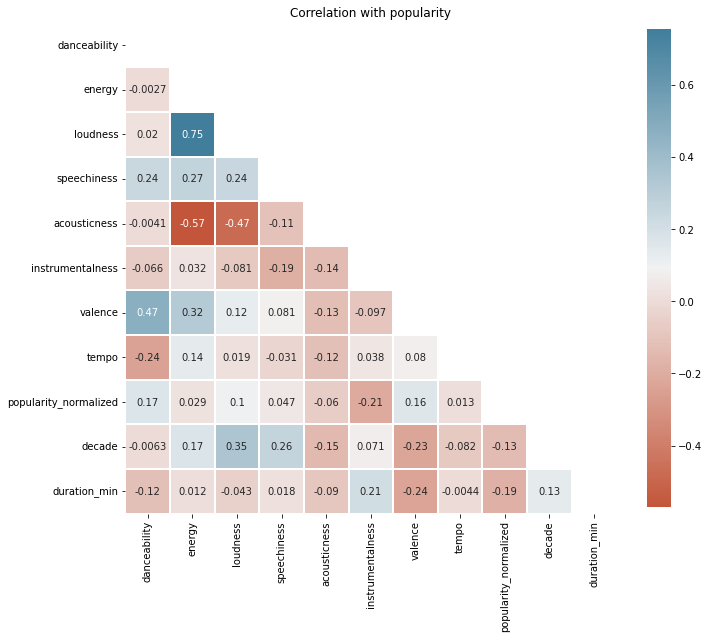

In [20]:
plt.figure(figsize=(11,11))
plt.title("Correlation with popularity")
corr = dfp.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(20, 230, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

In [21]:
dfc=df2.drop(["popularity_normalized"],axis=1)

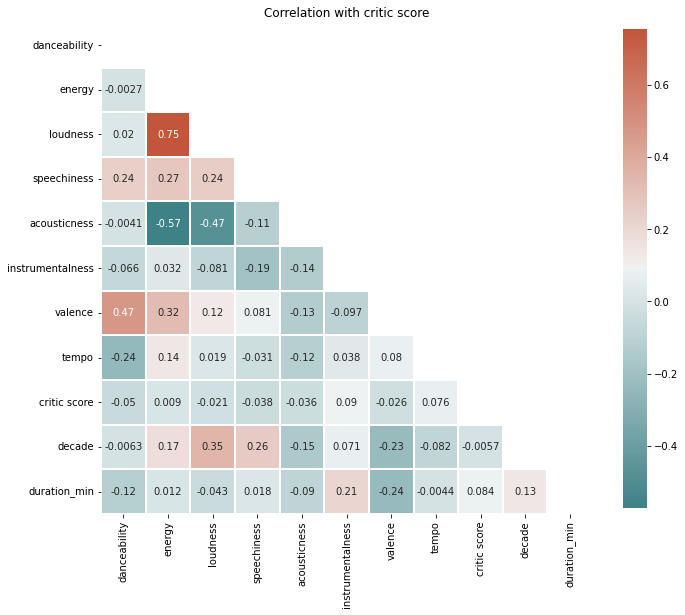

In [22]:
plt.figure(figsize=(11,11))
corr = dfc.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.title("Correlation with critic score")
sns.set_palette("Set2")
sns.heatmap(corr, 
            mask=mask, 
            annot=True, 
            cmap=sns.diverging_palette(200, 20, as_cmap=True),   
            square = True,                                 
            linewidths = 1.5,
            cbar_kws = {"shrink": .8});

The correlation plot of `popularity_normalized` is particularly useful because it highlights a lot of relationship between our variables. Instead from the `critic score` plot we cannot deduce any useful relation. We have chosen a minimum threshold for correlation which is 0.18 in order to inspect only the most useful pairs of nodes

#### Getting most correlated pairs of variables

In [23]:
corr_df = dfc.corr().abs() # we are interested in extracting the magnitude of the correlation
corr_series = corr_df.unstack() # Convert the corr_df to a pandas series
corr_series_sorted = corr_series.sort_values(kind="quicksortedrt",ascending=False) 
no_dup = corr_series_sorted[(corr_series_sorted < 0.9 ) & (corr_series_sorted >= 0.18)].drop_duplicates()
no_dup

loudness      energy              0.754051
acousticness  energy              0.571057
              loudness            0.474788
valence       danceability        0.474150
decade        loudness            0.348556
valence       energy              0.316167
energy        speechiness         0.271381
speechiness   decade              0.258126
loudness      speechiness         0.242535
danceability  tempo               0.241476
speechiness   danceability        0.237682
valence       duration_min        0.235908
decade        valence             0.230263
duration_min  instrumentalness    0.214456
speechiness   instrumentalness    0.188608
dtype: float64

In [24]:
print(f"There are {len(no_dup)} pairs above the selected correlation threshold")

There are 15 pairs above the selected correlation threshold


We are going to use this knowledge about the correlation between variables when constructing the bayesian network.

# Discretization


## Pre-processed columns
These columns are relatively easy to discretize because they are not purely numerical domain dependant attributes and we are able to use common knowledge about the musical domain for defining labels' ranges.

### 1. decade &rarr; musical era

Each discretized decade has been mapped into a label in the column **'era'** . For the labels we used some kind of intuition to determine the labels associated with each group of decade.  



The rationale is:

-  Albums released in a decade in range `[1910-1970]` are considered as **vintage**. This is a reasonable assumption considering 1970 was 50 years ago.

- Albums released in a decade in range `[1980-2000]` are considered as **modern**.

- Albums released in a decade in range `[2010-2020]` are considered as **contemporary**.

In [25]:
df2['era']=pd.cut(x=df2['decade'], bins=[1910,1970,2000,2020], 
                        labels=["vintage","modern","contemporary"])

### 2. duration_min &rarr; dur

Now we are going to inspect the `duration_min` variable by looking at two kind of plots:
1. we look at the distribution of values of duration_min in our dataset according to standard quantiles (i.e. first, second and third quantile)
2. we look at the distribution of values of duration_min according to knowledge about the musical domain. (i.e. [according to Billboard Hot 100 data "popular songs are, on average, 3 minutes and 30 seconds long"](https://www.musicianwave.com/whats-the-average-length-of-a-song-year/#:~:text=The%20average%20length%20of%20a%20song%20can%20change%20over%20time,minutes%20and%2030%20seconds%20long.))

Plots with standard quantiles

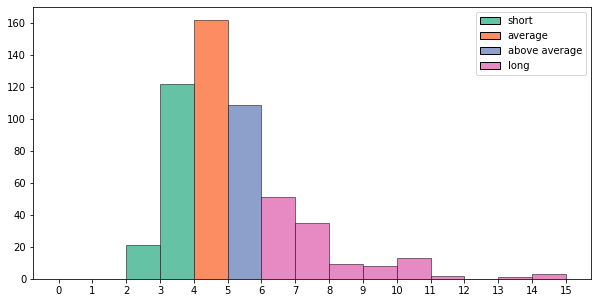

In [26]:
from matplotlib.patches import Rectangle # used for drawing colored patches

fig, ax = plt.subplots(figsize = (10,5))
cols = pal.as_hex()[:4] # save colors for labeling of quantiles
N, bins, patches = ax.hist(df2.duration_min,bins=range(np.max(df2.duration_min)+1), edgecolor='black', linewidth=0.5)

#get standard the first, second and third quantile
quant_25, quant_50, quant_75= int(df2.duration_min.quantile(0.25)),int(df2.duration_min.quantile(0.50)),int(df2.duration_min.quantile(0.75))

# color each patch with one of the colors
for i in range(0,quant_25+1):
    patches[i].set_facecolor(cols[0])
for i in range(quant_25+1 ,quant_50+1):    
    patches[i].set_facecolor(cols[1])
for i in range(quant_50+1, quant_75+1):
    patches[i].set_facecolor(cols[2])
for i in range(quant_75+1, len(patches)):
    patches[i].set_facecolor(cols[3])

#create legend for labels
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in  cols]
labels= ["short","average","above average","long"] # labels we want to use for discretization
plt.xticks(np.arange(0, max(df2.duration_min)+1, 1.0)) # set x-axis range
plt.legend(handles, labels)
plt.show()

The standard quantiles of our data are not useful for assigning labels for discretization because they do not represent the distribution of songs on average.

This is because we want to understand the relationship of song duration with respect to its success within music enthusiasts. So for example our hypothesis is that a song that is longer may be more critically acclaimed because it may contain long instrumental components whereas a commercial pop song has an average duration of 3 minutes and 30 seconds.

Plots with standard values for song duration:
- a song duration below 3 minutes is considered as *short*
- a song duration between 3 and 4 minutes is considered as *average*
- a song duration between 4 and 6 minutes is *above average*
- a song duration above 6 is considered as *long*

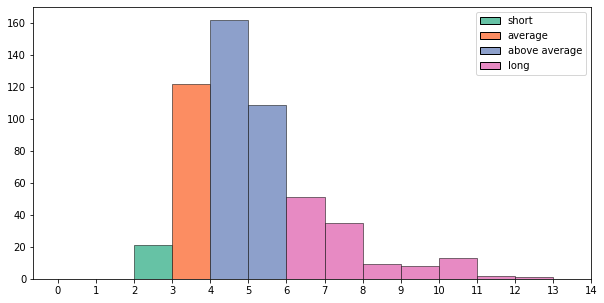

In [27]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize = (10,5))
cols = pal.as_hex()[:4]
N, bins, patches = ax.hist(df2.duration_min,bins=range(14), edgecolor='black', linewidth=0.5)

for i in range(0,3):
    patches[i].set_facecolor(cols[0])
for i in range(3 ,4):    
    patches[i].set_facecolor(cols[1])
for i in range(4, 6):
    patches[i].set_facecolor(cols[2])
for i in range(6, len(patches)):
    patches[i].set_facecolor(cols[3])

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in  cols]
labels= ["short","average","above average","long"]
plt.xticks(np.arange(0, max(df2.duration_min), 1.0))
plt.legend(handles, labels)
plt.show()

In [28]:
df2['dur']=pd.cut(x=df2['duration_min'],bins=[0,2,3,5,np.max(df2.duration_min)+1], 
                        labels=["short","average","above average","long"])

In [29]:
# Drop unused columns
df2 = df2.drop(["decade","duration_min"],axis=1)

Check if everything is ok with the dataframe

In [30]:
df2[df2.isnull().any(axis=1)]

,track_name,artists,album,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,critic score,popularity_normalized,era,dur


## Raw numerical columns

Now we need to discretize columns for which we need to rely on pre-existing knowledge provided by the `Spotify API` or, if this is not provided, using quantiles to compute the discretization. In order to better understand these columns we need to plot the histogram for those.

In [31]:
column_list=df2.columns.tolist()
print(df2.columns.tolist())

['track_name', 'artists', 'album', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'critic score', 'popularity_normalized', 'era', 'dur']


We exclude the columns which were already processed (`era`,`dur`) and `'track_name', 'artists', 'album'` which are not relevant for discretization.

In [32]:
non_str_col = [col for col in df2.columns if col not in ['track_name', 'artists', 'album','era', 'dur']] 
print(non_str_col, '\n')
print(f'There are {len(non_str_col)} columns which do not have entries with str dtype')

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'critic score', 'popularity_normalized'] 

There are 10 columns which do not have entries with str dtype


Inspecting histograms for understand which columns we can plot together

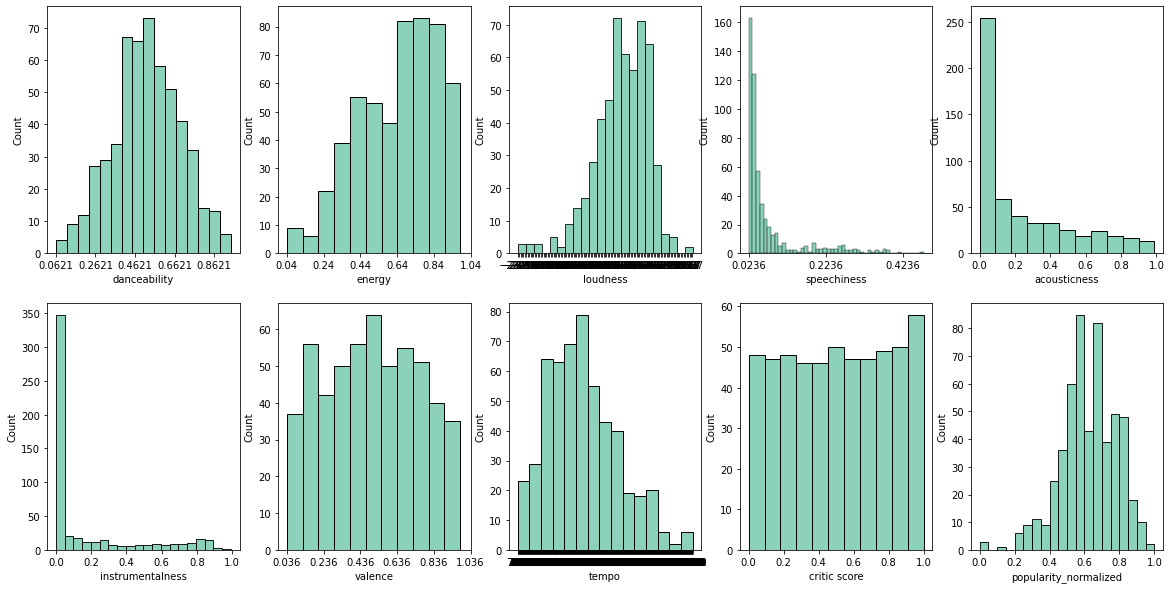

In [34]:
_, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = [axis for subl in axes for axis in subl]
for col, ax in zip(non_str_col, axes):
    sns.histplot(x=col, data=df2, ax=ax)
    ax.set_xticks(np.arange(min(df2[col]), max(df2[col])+0.1, step=0.2))

From this plot we can see that:

- The `tempo` and `loudness` column have a lot of unique value therefore we will need to visualize them one by one, same can be said for `speechiness`
- `valence`, `energy` and `danceability` have similar ranges of values
- `instrumentalness`, `acousticness` can be looked at together because they have a lot of values stacked towards zero
- `critic score` and `popularity` will be inspected together

### tempo, loudness and speechiness

In [59]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,10

* **tempo**:
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

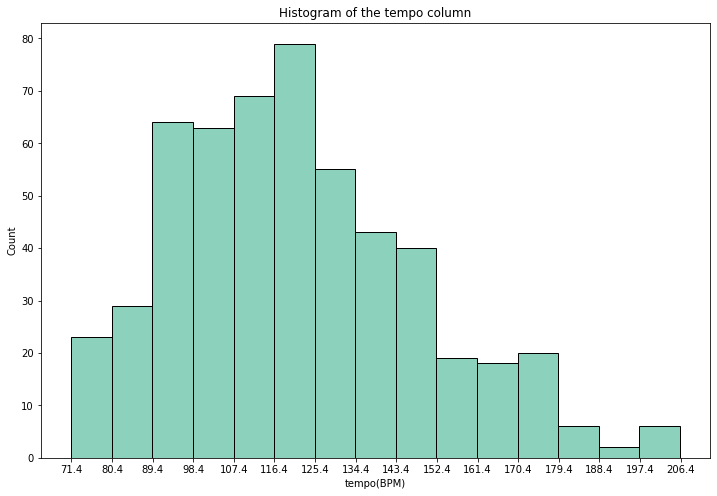

In [36]:
sns.histplot(x="tempo", data=df2)
plt.xlabel("tempo(BPM)")
plt.title("Histogram of the tempo column")
plt.xticks(np.arange(min(df2["tempo"]), max(df2["tempo"])+9, step=9));

From the plot we cannot deduce meaningful conclusions, therefore we will use quantiles.

In [37]:
print(("The minimum and maximum value of the tempo column are respectively {} and {}").format(np.min(df2.tempo), np.max(df2.tempo)))

The minimum and maximum value of the tempo column are respectively 71.398 and 206.247


In [40]:
quant_25_t, quant_50_t, quant_75_t= int(df2.tempo.quantile(0.25)),int(df2.tempo.quantile(0.50)),int(df2.tempo.quantile(0.75))
df2['tem']=pd.cut(x=df2['tempo'], bins=[np.min(df2.tempo)-0.1,quant_25_t,quant_50_t,np.max(df2.tempo)], 
                        labels=["slow tempo","medium tempo","high tempo"])

* **loudness**: The overall loudness of a track in decibels (*dB*). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 dB.

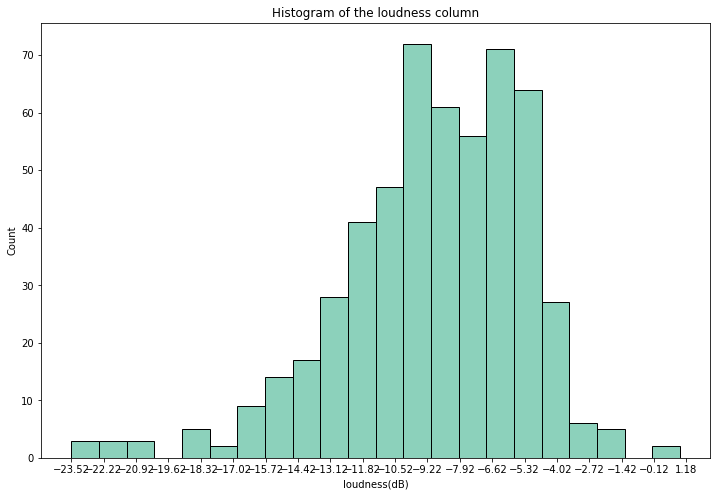

In [39]:
sns.histplot(x="loudness", data=df2)
plt.title("Histogram of the loudness column")
plt.xlabel("loudness(dB)")
plt.xticks(np.arange(min(df2["loudness"]), max(df2["loudness"]+1.3), step=1.3));

We cannot infer much from this plot

In [41]:
quant_25_l, quant_50_l, quant_75_l= int(df2.loudness.quantile(0.25)),int(df2.loudness.quantile(0.50)),int(df2.loudness.quantile(0.75))
df2['loud']=pd.cut(x=df2['loudness'], bins=[np.min(df2.loudness)-0.1,quant_25_l,quant_50_l,np.max(df2.loudness)], 
                        labels=["quiet","average","loud"])

### Speechiness

* **speechiness**:
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values *above 0.66* describe tracks that are probably made entirely of spoken words. Values *between 0.33 and 0.66* describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values *below 0.33* most likely represent music and other non-speech-like tracks.



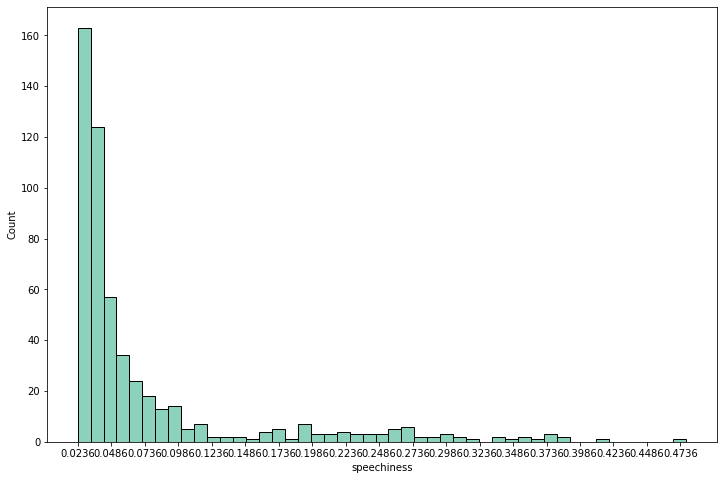

In [42]:
sns.histplot(x="speechiness", data=df2)
plt.xticks(np.arange(min(df2["speechiness"]), max(df2["speechiness"]+0.02), step=0.025));

For the discretization of the `speechiness` variable we had to use different values than the ones provided by the `Spotify API` because the spotify API also takes into account podcasts. Insted our analysis wants to distinguish standard songs and very verbose songs.

we can see a lot of data is accumulated towards the start value therefore the variable will be binary.

We choose to split according to the second quantile because the variable has many values towards the start of the data range.

In [43]:
quant_25_s, quant_50_s, quant_75_s= round(df2.speechiness.quantile(0.25),2),round(df2.speechiness.quantile(0.50),3),round(df2.speechiness.quantile(0.75),3)
df2['speech']=pd.cut(x=df2['speechiness'], bins=[0,quant_50_s,np.max(df2.speechiness)], 
                        labels=["standard word density","high word density"])

In [44]:
df2 = df2.drop(["speechiness","loudness","tempo"],axis=1)

## Grouped columns

We split the data according to the division discussed above.

In [45]:
column_list = df2.columns.tolist()
print(column_list)

['track_name', 'artists', 'album', 'danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'critic score', 'popularity_normalized', 'era', 'dur', 'tem', 'loud', 'speech']


In [46]:
group1 = ['danceability', 'energy','valence']
group2 = ['acousticness', 'instrumentalness']
group3 = ['critic score', 'popularity_normalized']

## Group 1: 'danceability', 'energy', 'valence'

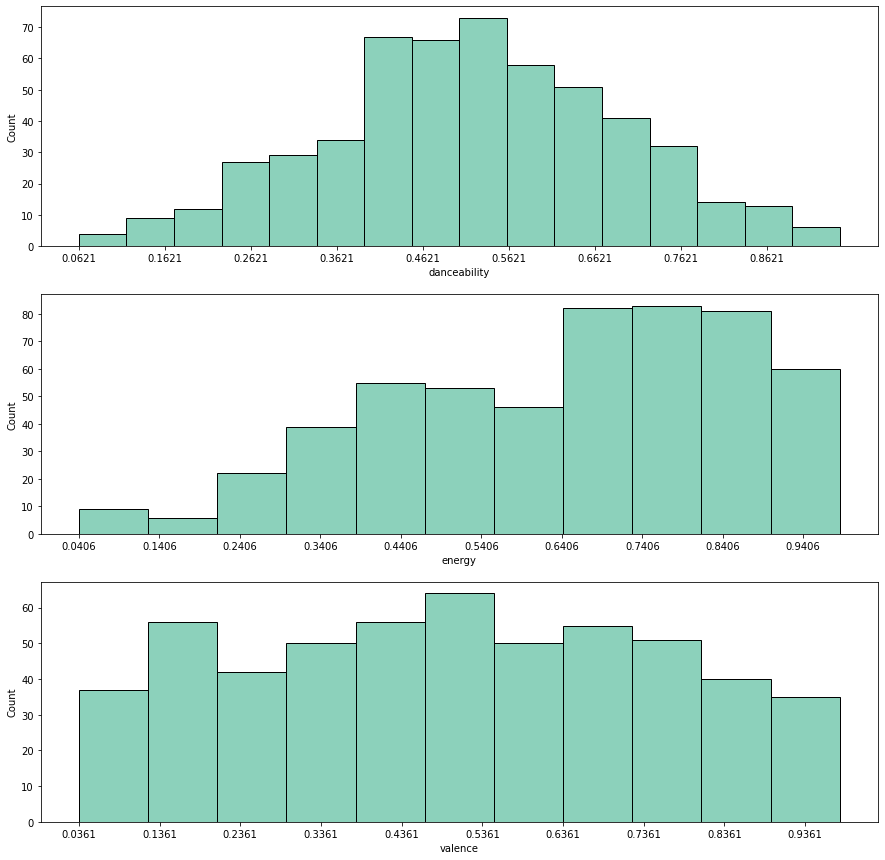

In [47]:
_, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
for col, ax in zip(group1, axes):
    sns.histplot(x=col, data=df2, ax=ax)
    ax.set_xticks(np.arange(min(df2[col]), max(df2[col]), step=0.1))

* **valence**:
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with *high valence* sound *more positive* (e.g. happy, cheerful, euphoric), while tracks with *low valence* sound *more negative* (e.g. sad, depressed, angry).


In [48]:
quant_25_v, quant_50_v, quant_75_v= df2.valence.quantile(0.25),df2.valence.quantile(0.50),df2.valence.quantile(0.75)
df2['val']=pd.cut(x=df2['valence'], bins=[np.min(df2.valence)-0.1,quant_25_v,quant_50_v,1], 
                        labels=["sad","neutral","euphoric"])


* **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.




In [49]:
quant_25_d, quant_50_d, quant_75_d= round(df2.danceability.quantile(0.25),3),round(df2.danceability.quantile(0.50),3),round(df2.danceability.quantile(0.75),3)
df2['dan']=pd.cut(x=df2['danceability'], bins=[-1,quant_25_d,quant_50_d,1], 
                        labels=["low danceability","standard danceability","high danceability"])

* **energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

In [50]:
quant_25_e, quant_50_e, quant_75_e= round(df2.energy.quantile(0.25),3),round(df2.energy.quantile(0.50),3),round(df2.energy.quantile(0.75),3)
df2['ene']=pd.cut(x=df2['energy'], bins=[-.01,quant_25_e,quant_50_e,1], 
                        labels=["slow","medium","energic"])

In [51]:
df2 = df2.drop(group1,axis=1)

## Group 2: 'acousticness', 'instrumentalness' 

These two columns are very polarized towards zero therefore a boolean discretization is required

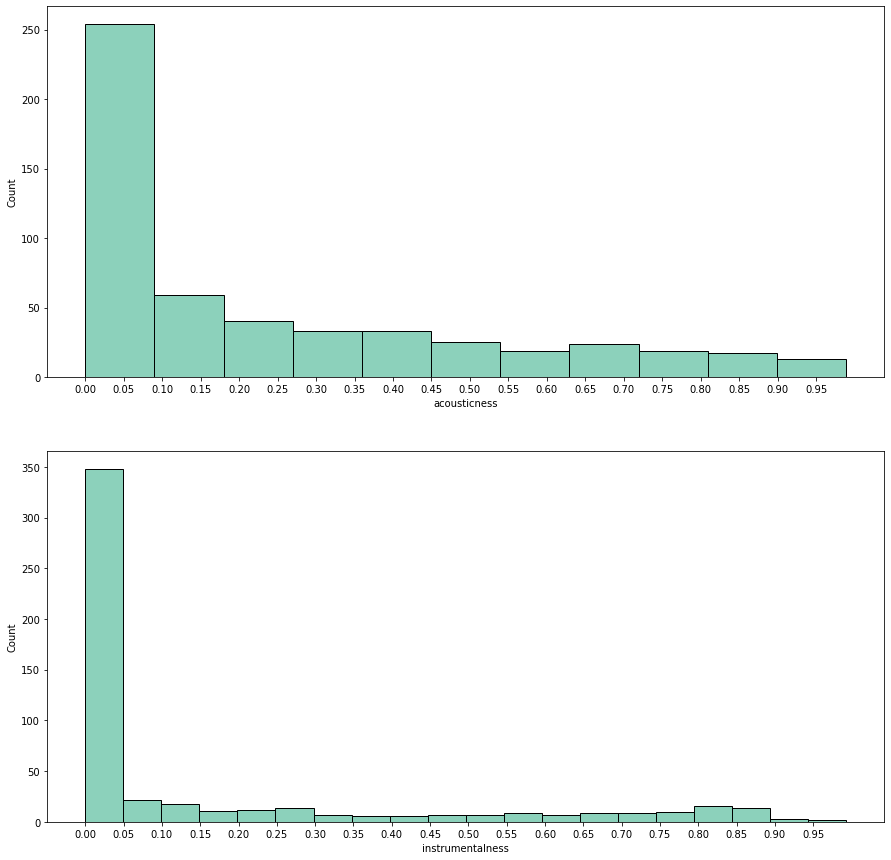

In [52]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
for col, ax in zip(group2, axes):
    sns.histplot(x=col, data=df2, ax=ax)
    ax.set_xticks(np.arange(min(df2[col]), max(df2[col]), step=0.05))



* **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values *above 0.5* are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.


In [54]:
quant_25_i, quant_50_i, quant_75_i= df2.instrumentalness.quantile(0.25),round(df2.instrumentalness.quantile(0.50),4),round(df2.instrumentalness.quantile(0.75),4)
df2['instr']=pd.cut(x=df2['instrumentalness'], bins=[-.01,quant_50_i,np.max(df2.instrumentalness)], 
                        labels=["not instrumental","instrumental"])
# this column has been discretizated as boolean 

* **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


In [55]:
quant_25_a, quant_50_a, quant_75_a= round(df2.acousticness.quantile(0.25),3),round(df2.acousticness.quantile(0.50),3),round(df2.acousticness.quantile(0.75),3)
df2['aco']=pd.cut(x=df2['acousticness'], bins=[-.01,quant_50_a,1], 
                        labels=["not acoustic","acoustic"]) 
# this column has been discretizated as boolean 

In [56]:
df2 =df2.drop(group2,axis=1)

## Group 3: 'Popularity', 'Critic score'

* **Popularity**: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. 
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. 
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity

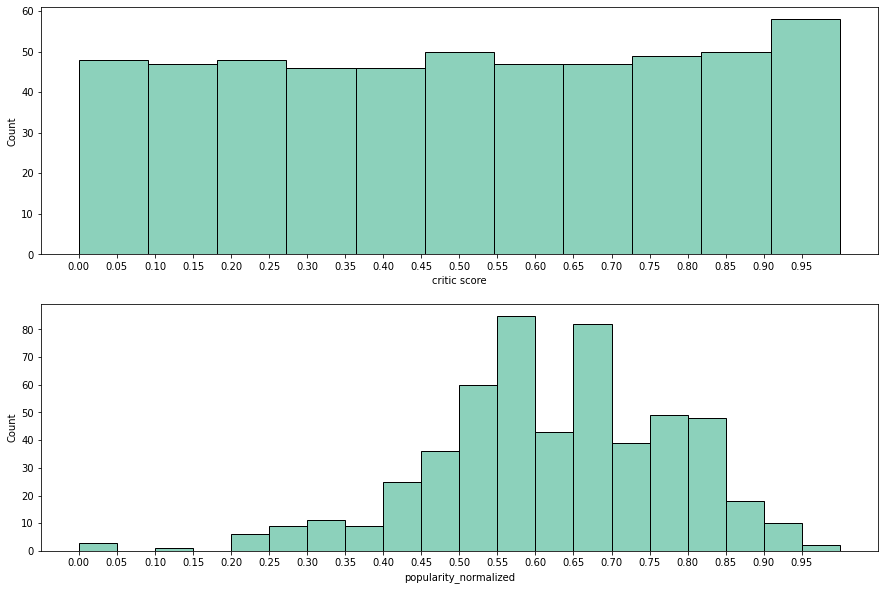

In [58]:
_, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
for col, ax in zip(group3, axes):
    sns.histplot(x=col, data=df2, ax=ax)
    ax.set_xticks(np.arange(min(df2[col]), max(df2[col]), step=0.05))

In [60]:
quant_25_p, quant_50_p, quant_75_p= df2.popularity_normalized.quantile(0.25),df2.popularity_normalized.quantile(0.50),df2.popularity_normalized.quantile(0.75)
df2['pop']=pd.cut(x=df2['popularity_normalized'], bins=[-.01,quant_25_p,quant_50_p,1], 
                        labels=["low popularity","standard popularity","high popularity"])

In [61]:
quant_25_c, quant_50_c, quant_75_c= round(df2['critic score'].quantile(0.25),2),round(df2['critic score'].quantile(0.50),2),round(df2['critic score'].quantile(0.75),2)
df2['crit']=pd.cut(x=df2['critic score'], bins=[-.01,quant_25_c,quant_50_c,1], 
                        labels=["low critically score","average critical score","high critical score"])

In [62]:
strings = ["track_name","artists","album"]

In [63]:
df3 = df2.drop(group3+strings, axis=1) #drop columns no longer of use
df3.head()

,era,dur,tem,loud,speech,val,dan,ene,instr,aco,pop,crit
0,contemporary,average,high tempo,loud,standard word density,euphoric,low danceability,medium,not instrumental,acoustic,standard popularity,high critical score
1,contemporary,average,medium tempo,average,standard word density,neutral,standard danceability,slow,not instrumental,acoustic,low popularity,high critical score
2,vintage,long,high tempo,quiet,high word density,euphoric,standard danceability,medium,not instrumental,acoustic,high popularity,high critical score
3,modern,long,medium tempo,quiet,standard word density,sad,low danceability,slow,instrumental,acoustic,high popularity,high critical score
4,modern,above average,high tempo,average,high word density,sad,low danceability,energic,instrumental,not acoustic,high popularity,high critical score


# Network structure

In order to restrict the scope of the project columns which are irrelevant and are too specific
to handle only attributes that have been considered particularly relevant were considered. 

From the preprocessing we have obtained the following discretization, the variables name have been shortened to make the network more compact. A description of each abbreviation for readibility.

- year &rarr; 'era',
- duration_ms &rarr; 'dur',
- instrumentalness &rarr; 'instr',
- speechiness &rarr; 'speech',
- valence &rarr; 'val',
- danceability &rarr; 'dan',
- acousticness &rarr; 'aco',
- popularity &rarr; 'pop',
- critic score &rarr; 'crit',
- tempo &rarr; 'tem',
- loudness &rarr; 'loud',
- energy &rarr; 'ene'

Connections between nodes have been implemented firstly by looking at correlation between columns and by reasoning about independence and relationship between variables.   

# Bayesian network example


### Analyzing the network

In [64]:
from pgmpy.models import BayesianModel 

In [65]:
import daft
import matplotlib.pyplot as plt
from daft import PGM

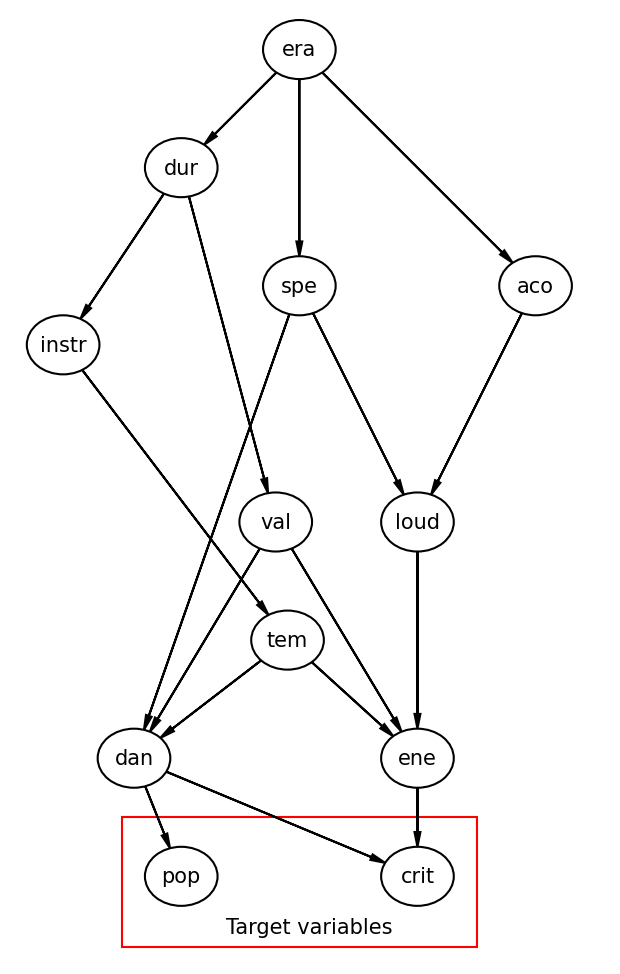

In [69]:
pgm = daft.PGM(aspect=1.23,directed=True,dpi=150,shape=[5,8])
plt.rcParams["figure.facecolor"] = "w"

# Defining the nodes

pgm.add_node('era', r"era", 3, 8)
pgm.add_node(daft.Node('dur', r"dur", 2, 7))

pgm.add_node(daft.Node('speech', r"spe", 3, 6))
pgm.add_node(daft.Node('aco', r"aco", 5, 6))

pgm.add_node(daft.Node('instr', r"instr", 1, 5.5))
pgm.add_node(daft.Node('val', r"val", 2.8,4))
pgm.add_node(daft.Node('loud', r"loud", 4, 4))

pgm.add_node(daft.Node('tem', r"tem", 2.9, 3))
pgm.add_node(daft.Node('ene', r"ene", 4, 2))
pgm.add_node(daft.Node('dan', r"dan", 1.6, 2))

pgm.add_node(daft.Node('pop', r"pop", 2, 1))
pgm.add_node(daft.Node('crit', r"crit", 4, 1))

#edges

pgm.add_edge('era', 'dur')
pgm.add_edge('era', 'aco')
pgm.add_edge('era', 'speech')

pgm.add_edge('dur', 'instr')
pgm.add_edge('dur', 'val')

pgm.add_edge('instr', 'tem')
pgm.add_edge('speech', 'loud')
pgm.add_edge('speech', 'dan')

pgm.add_edge('aco', 'loud')
pgm.add_edge('val', 'dan')
pgm.add_edge('val', 'ene')

pgm.add_edge('loud', 'ene')
pgm.add_edge('tem', 'ene')
pgm.add_edge('tem', 'dan')

pgm.add_edge('dan', 'pop')
pgm.add_edge('dan', 'crit')
pgm.add_edge('ene', 'crit')

pgm.add_plate([1.5,0.5,3, 1],label=r"Target variables ",shift=-0.1,label_offset=[50,5],rect_params={"ec":"red"})
pgm.render()
plt.show()

# Network analysis

To build network's connections, 3 approaches were used:

- Previous domain knowledge
- Correlation between-nodes  
- Both above-mentioned approaches

### Previous domain knowledge based connections:

| Ancestor Node | Descendant Node |
| ----------- | ----------- |
| Instrumentalness | Tempo |
| Danceability | Critic Score |
| Energy | Critic Score |


The connection between `Instrumentalness` and `Tempo` is suggested by the fact that if a song is instrumental then it will probably be slower implying lower BPM. \
The second and third connections are given by the importance that `Danceability` and `Energy` have in determing the experts' judgement thus determining the `Critic Score`.

### Correlation between-nodes based connections:

| Ancestor Node | Descendant Node | Correlation |
| ----------- | ----------- | ----------- |
| Era | Speechiness | high (0.26) |
| Duration | Instrumentalness | slight (0.21) |
| Duration | Valence | high (0.25) |
| Valence | Danceability | high (0.48) |
| Valence | Energy | high (0.31) |
| Loudness | Energy | very high (0.76) |

Veloce commento

### Between-nodes Correlation + Previous domain knowledge based connections:

| Ancestor Node | Descendant Node | Correlation |
| ----------- | ----------- | ----------- |
| Era | Duration | slight (0.13) |
| Era | Acousticness | slight (0.15) |
| Speechiness | Danceability | slight (0.23) |
| Speechiness | Loudness | high (0.25) |
| Acousticness | Loudness | high (0.48) |
| Tempo | Danceability | high (0.25) |
| Tempo | Energy | slight (0.15) |
| Danceability | Popularity | high (0.25) |

We decided to keep those couples with correlation below our minimum (`0.18`) due to their association suggested by previous knowledge in musical domain. In fact, the connections between `Era` and both `Duration` and `Acousticness` is suggested by the increasing trend to make shorter radio-suitable songs every year. At the same time, acoustic songs are less common nowadays w.r.t. 50 years ago.

## Model creation

Create bayesian model from the daft PGM model

In [70]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

In [71]:
model = convert_pgm_to_pgmpy(pgm)

In [72]:
model.nodes() # displaying model's nodes

NodeView(('era', 'dur', 'aco', 'speech', 'instr', 'val', 'tem', 'loud', 'dan', 'ene', 'pop', 'crit'))

In [73]:
model.edges() # displaying edges between nodes

OutEdgeView([('era', 'dur'), ('era', 'aco'), ('era', 'speech'), ('dur', 'instr'), ('dur', 'val'), ('aco', 'loud'), ('speech', 'loud'), ('speech', 'dan'), ('instr', 'tem'), ('val', 'dan'), ('val', 'ene'), ('tem', 'ene'), ('tem', 'dan'), ('loud', 'ene'), ('dan', 'pop'), ('dan', 'crit'), ('ene', 'crit')])

#### Local independecies

In the below cell are printed all the local independencies for each of the node of the network. We can see that by fixing the value for some nodes we can stop the flow of influence between other nodes.

For example if we fix the `era` of a song its duration is independent of acousticness, loudness and speechiness because era stops the flow of influence to duration.

Another example is `instrumentalness` if we fix knowledge about the duration of the song it is independent of aco, loud, instr, tem, era, speech.

In [74]:
for node in model.nodes():
    print(f"node {node} ==> {model.local_independencies(node)}")

node era ==> 
node dur ==> (dur ⟂ speech, loud, aco | era)
node aco ==> (aco ⟂ tem, instr, dan, val, pop, dur, speech | era)
node speech ==> (speech ⟂ tem, instr, val, aco, dur | era)
node instr ==> (instr ⟂ loud, val, aco, era, speech | dur)
node val ==> (val ⟂ tem, loud, instr, aco, era, speech | dur)
node tem ==> (tem ⟂ loud, val, aco, dur, era, speech | instr)
node loud ==> (loud ⟂ tem, instr, dan, val, pop, dur, era | speech, aco)
node dan ==> (dan ⟂ loud, instr, aco, dur, era, ene | tem, speech, val)
node ene ==> (ene ⟂ instr, dan, aco, pop, dur, era, speech | tem, loud, val)
node pop ==> (pop ⟂ tem, loud, crit, instr, aco, dur, val, speech, era, ene | dan)
node crit ==> (crit ⟂ tem, loud, instr, aco, dur, val, pop, speech, era | ene, dan)


#### Directly connected nodes

Checking d-separation between variables first with no evidence and then by providing evidence

In [75]:
print(model.is_dconnected("ene", "aco")) 
print(model.is_dconnected("ene", "aco",observed=["loud","val","tem"] )) #blocking all paths to ene

True
False


#### Active trail nodes

In [76]:
# Checking active trails from energy  given the evidence danceability
model.active_trail_nodes('ene', observed='dan')

{'ene': {'aco',
  'crit',
  'dur',
  'ene',
  'era',
  'instr',
  'loud',
  'speech',
  'tem',
  'val'}}

In [77]:
# Checking the markov blanket of the node ene
model.get_markov_blanket("ene") 

['tem', 'loud', 'crit', 'dan', 'val']

### Parameter learning

In this section we estimate the CPDs

In [78]:
from pgmpy.estimators import BayesianEstimator

model.cpds = []
model.fit(data=df3, estimator=BayesianEstimator, prior_type="BDeu")

for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd, '\n')

CPT of era:
+-------------------+----------+
| era(contemporary) | 0.204559 |
+-------------------+----------+
| era(modern)       | 0.505853 |
+-------------------+----------+
| era(vintage)      | 0.289587 |
+-------------------+----------+ 

CPT of dur:
+--------------------+-----+---------------------+
| era                | ... | era(vintage)        |
+--------------------+-----+---------------------+
| dur(above average) | ... | 0.36648936170212765 |
+--------------------+-----+---------------------+
| dur(average)       | ... | 0.3728723404255319  |
+--------------------+-----+---------------------+
| dur(long)          | ... | 0.18776595744680852 |
+--------------------+-----+---------------------+
| dur(short)         | ... | 0.07287234042553191 |
+--------------------+-----+---------------------+ 

CPT of aco:
+-------------------+-----+---------------------+
| era               | ... | era(vintage)        |
+-------------------+-----+---------------------+
| aco(acoustic)   

In [79]:
# Checking the validity of the model 
model.check_model()

True

In [80]:
#Cardinality of all model nodes
model.get_cardinality()

defaultdict(int,
            {'era': 3,
             'dur': 4,
             'aco': 2,
             'speech': 2,
             'instr': 2,
             'val': 3,
             'tem': 3,
             'loud': 3,
             'dan': 3,
             'ene': 3,
             'pop': 3,
             'crit': 3})

We can see we have high cardinality for variables, this was a modeling choice to capture the nuances of some variables that could not be simply casted to boolean and needed to be discretized in a way that captured the complexity of the data. 

##  Inferences

###  Exact Inference

In [81]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

#### Casual inference

Will a song be critically acclaimed depending on its danceability if we know it is slow?

In [82]:
#Causal inference:  predicting will the song be popular if it is highly danceable but with a highly instrumental component? 
print(infer.query(["pop"],evidence={"val": "sad", "tem": "high tempo"}))

+--------------------------+------------+
| pop                      |   phi(pop) |
+==========================+============+
| pop(high popularity)     |     0.4537 |
+--------------------------+------------+
| pop(low popularity)      |     0.2963 |
+--------------------------+------------+
| pop(standard popularity) |     0.2500 |
+--------------------------+------------+


#### Evidential inference


explaining the probability of a song being energic given that it received an high critical score.

In [83]:
print(infer.query(["ene"],evidence={"crit": "high critical score"}))

+--------------+------------+
| ene          |   phi(ene) |
+==============+============+
| ene(energic) |     0.5255 |
+--------------+------------+
| ene(medium)  |     0.2174 |
+--------------+------------+
| ene(slow)    |     0.2571 |
+--------------+------------+


Interstingly critic score tends to be higher when we have knowledge of the danceability being standard.

#### Intercausal inference

Now we want to see why a song received an high critical score given it wasn't energetic

In [137]:
print(infer.query(["dan"],evidence={"crit": "high critical score", "ene": "slow"}))

+----------------------------+------------+
| dan                        |   phi(dan) |
+============================+============+
| dan(high danceability)     |     0.3707 |
+----------------------------+------------+
| dan(low danceability)      |     0.3108 |
+----------------------------+------------+
| dan(standard danceability) |     0.3185 |
+----------------------------+------------+


We cannot infer much from the above plot but we can say there is a slightly more chance that the song received an high critical score because of high danceability

### Predicting values from new data points

MAP query: getting the most probable state of the variable

In [84]:
#Infer MAP queries
print(infer.map_query(["loud"]))
print(infer.map_query(["loud"], evidence={'speech': "high word density"}))
print(infer.map_query(["loud"], evidence={'speech': "standard word density", 'aco': "not acoustic"}))
print(infer.map_query(["loud"], evidence={'speech': "standard word density", 'aco': "acoustic"}))


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

{'loud': 'loud'}


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'loud': 'loud'}


0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'loud': 'loud'}


0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'loud': 'quiet'}


We can see the loudness most probable value changing by fixing different values for the variable that directly influences it

### Approximate Inference

In [87]:
from pgmpy.inference import ApproxInference
from pgmpy.sampling import BayesianModelSampling

infer = ApproxInference(model)
inference = BayesianModelSampling(model)

In [88]:
# Sampling from an empty network
print(infer.query(variables=["crit"], n_samples=100)) 

  0%|          | 0/12 [00:00<?, ?it/s]

+------------------------------+-------------+
| crit                         |   phi(crit) |
+==============================+=============+
| crit(average critical score) |      0.3100 |
+------------------------------+-------------+
| crit(high critical score)    |      0.4700 |
+------------------------------+-------------+
| crit(low critically score)   |      0.2200 |
+------------------------------+-------------+


In [89]:
# Showing the convergence increasing number of samples

print("10 samples")
print(infer.query(variables=["crit"], n_samples=10)) #approximate probability with a low number of samples

print("\n 1000 samples ")
print(infer.query(variables=["crit"], n_samples=1000)) #approximate probability with an high number of samples

print("\n True probability")
print(VariableElimination(model).query(["crit"]))      #true probability

10 samples


  0%|          | 0/12 [00:00<?, ?it/s]

+------------------------------+-------------+
| crit                         |   phi(crit) |
+==============================+=============+
| crit(average critical score) |      0.1000 |
+------------------------------+-------------+
| crit(high critical score)    |      0.7000 |
+------------------------------+-------------+
| crit(low critically score)   |      0.2000 |
+------------------------------+-------------+

 1000 samples 


  0%|          | 0/12 [00:00<?, ?it/s]

+------------------------------+-------------+
| crit                         |   phi(crit) |
+==============================+=============+
| crit(average critical score) |      0.2310 |
+------------------------------+-------------+
| crit(high critical score)    |      0.5210 |
+------------------------------+-------------+
| crit(low critically score)   |      0.2480 |
+------------------------------+-------------+

 True probability
+------------------------------+-------------+
| crit                         |   phi(crit) |
+==============================+=============+
| crit(average critical score) |      0.2529 |
+------------------------------+-------------+
| crit(high critical score)    |      0.4967 |
+------------------------------+-------------+
| crit(low critically score)   |      0.2504 |
+------------------------------+-------------+


In [90]:
# Showing the results of a sampling process
print(inference.likelihood_weighted_sample(size=5)) #size = number of samples

  0%|          | 0/12 [00:00<?, ?it/s]

            era            dur           aco                 speech  \
0        modern  above average  not acoustic  standard word density   
1        modern        average  not acoustic      high word density   
2        modern           long  not acoustic  standard word density   
3  contemporary  above average  not acoustic  standard word density   
4       vintage           long      acoustic      high word density   

              instr       val           tem   loud                    dan  \
0  not instrumental       sad    high tempo  quiet      high danceability   
1  not instrumental  euphoric    slow tempo  quiet      high danceability   
2      instrumental   neutral    high tempo  quiet  standard danceability   
3  not instrumental  euphoric  medium tempo  quiet      high danceability   
4      instrumental  euphoric    high tempo  quiet      high danceability   

       ene              pop                  crit  _weight  
0     slow  high popularity   high critical score

In [91]:
# Likelihood sampling
print(infer.get_distribution(inference.likelihood_weighted_sample(size=50), ["pop"], joint=True))

  0%|          | 0/12 [00:00<?, ?it/s]

+--------------------------+------------+
| pop                      |   phi(pop) |
+==========================+============+
| pop(high popularity)     |     0.5800 |
+--------------------------+------------+
| pop(low popularity)      |     0.2600 |
+--------------------------+------------+
| pop(standard popularity) |     0.1600 |
+--------------------------+------------+


In [92]:
# Rejection sampling
print(infer.get_distribution(inference.rejection_sample(size=50), ["pop"]))

  0%|          | 0/12 [00:00<?, ?it/s]

+--------------------------+------------+
| pop                      |   phi(pop) |
+==========================+============+
| pop(high popularity)     |     0.4400 |
+--------------------------+------------+
| pop(low popularity)      |     0.2400 |
+--------------------------+------------+
| pop(standard popularity) |     0.3200 |
+--------------------------+------------+


###  Query 1:

In [130]:
infer = VariableElimination(model)

In [131]:
pop_value = df3['pop'].unique().sort_values()

In [132]:
for pop in pop_value:
  print("Probability of being popular given the danceability :",pop) # check, dovrebbe essere il contrario
  print(infer.query(["dan"], evidence={"pop":pop}))

Probability of being popular given the danceability : low popularity
+----------------------------+------------+
| dan                        |   phi(dan) |
+============================+============+
| dan(high danceability)     |     0.4107 |
+----------------------------+------------+
| dan(low danceability)      |     0.3186 |
+----------------------------+------------+
| dan(standard danceability) |     0.2707 |
+----------------------------+------------+
Probability of being popular given the danceability : standard popularity
+----------------------------+------------+
| dan                        |   phi(dan) |
+============================+============+
| dan(high danceability)     |     0.5028 |
+----------------------------+------------+
| dan(low danceability)      |     0.2712 |
+----------------------------+------------+
| dan(standard danceability) |     0.2260 |
+----------------------------+------------+
Probability of being popular given the danceability : high popula

We can see a more danceable song tends to be more popular

###  Query 2: 

What's the difference in danceability between songs that are sad and with a standard word density, and tracks that are euphoric and verbose?

Discuss results her

In [133]:
print("standard word density and sad")
print(infer.query(["dan"], evidence={"speech": 'standard word density', "val":'sad'}))
print("high word density and sad")
print(infer.query(["dan"], evidence={"speech": 'high word density', "val":'sad'}))
print("standard word density and euphoric")
print(infer.query(["dan"], evidence={"speech": 'standard word density', "val":'euphoric'}))
print("high word density and euphoric")
print(infer.query(["dan"], evidence={"speech": 'high word density', "val":'euphoric'}))

standard word density and sad
+----------------------------+------------+
| dan                        |   phi(dan) |
+============================+============+
| dan(high danceability)     |     0.2618 |
+----------------------------+------------+
| dan(low danceability)      |     0.4652 |
+----------------------------+------------+
| dan(standard danceability) |     0.2730 |
+----------------------------+------------+
high word density and sad
+----------------------------+------------+
| dan                        |   phi(dan) |
+============================+============+
| dan(high danceability)     |     0.2435 |
+----------------------------+------------+
| dan(low danceability)      |     0.5174 |
+----------------------------+------------+
| dan(standard danceability) |     0.2391 |
+----------------------------+------------+
standard word density and euphoric
+----------------------------+------------+
| dan                        |   phi(dan) |
+============================

We can see that if we fix the `valence` it has a great influence on the `danceability`, instead the `speechiness` has less, but still appreciable effect of $5\%$ on the CPT.

### Query 3:

Gotta add smth here later

In [134]:
eras = df3['era'].unique().sort_values()
durations = df3['dur'].unique().sort_values()

for era in eras:
    for duration in durations:
        print(f"Probability of being critically acclaimed given track's duration and musical era : ({era},{duration})")
        print(infer.query(["pop"], evidence={"era":era, "dur":duration}))

Probability of being critically acclaimed given track's duration and musical era : (vintage,short)
+--------------------------+------------+
| pop                      |   phi(pop) |
+==========================+============+
| pop(high popularity)     |     0.4991 |
+--------------------------+------------+
| pop(low popularity)      |     0.2547 |
+--------------------------+------------+
| pop(standard popularity) |     0.2463 |
+--------------------------+------------+
Probability of being critically acclaimed given track's duration and musical era : (vintage,average)
+--------------------------+------------+
| pop                      |   phi(pop) |
+==========================+============+
| pop(high popularity)     |     0.4963 |
+--------------------------+------------+
| pop(low popularity)      |     0.2574 |
+--------------------------+------------+
| pop(standard popularity) |     0.2462 |
+--------------------------+------------+
Probability of being critically acclaimed gi

In [135]:
eras = df3['era'].unique().sort_values()
durations = df3['dur'].unique().sort_values()

for era in eras:
    for duration in durations:
        print(f"Probability of being critically acclaimed given track's duration and musical era : ({era},{duration})")
        print(infer.query(["crit"], evidence={"era":era, "dur":duration}))

Probability of being critically acclaimed given track's duration and musical era : (vintage,short)
+------------------------------+-------------+
| crit                         |   phi(crit) |
+==============================+=============+
| crit(average critical score) |      0.2584 |
+------------------------------+-------------+
| crit(high critical score)    |      0.4930 |
+------------------------------+-------------+
| crit(low critically score)   |      0.2486 |
+------------------------------+-------------+
Probability of being critically acclaimed given track's duration and musical era : (vintage,average)
+------------------------------+-------------+
| crit                         |   phi(crit) |
+==============================+=============+
| crit(average critical score) |      0.2567 |
+------------------------------+-------------+
| crit(high critical score)    |      0.4941 |
+------------------------------+-------------+
| crit(low critically score)   |      0.2491 |
+

- (vintage,long) 0.51
- (modern,average) 0.50
- 

We can see a small increment due to the duration if the song is vintage.
\
The score has a more dramatic   

###  Query 4: 

We want to analyze the difference in acousticness appreciation between music enthusiasts and casual listeners 

In [136]:
scores = df3['crit'].unique().sort_values()
pop_vals = df3['pop'].unique().sort_values()

for score in scores:
    print(score,":")
    print(infer.query(["aco"], evidence={"crit":score}))


print("\n")
for pop in pop_vals:
    print(pop,":")
    print(infer.query(["aco"], evidence={"pop":pop}))

low critically score :
+-------------------+------------+
| aco               |   phi(aco) |
+===================+============+
| aco(acoustic)     |     0.5005 |
+-------------------+------------+
| aco(not acoustic) |     0.4995 |
+-------------------+------------+
average critical score :
+-------------------+------------+
| aco               |   phi(aco) |
+===================+============+
| aco(acoustic)     |     0.5014 |
+-------------------+------------+
| aco(not acoustic) |     0.4986 |
+-------------------+------------+
high critical score :
+-------------------+------------+
| aco               |   phi(aco) |
+===================+============+
| aco(acoustic)     |     0.4990 |
+-------------------+------------+
| aco(not acoustic) |     0.5010 |
+-------------------+------------+


low popularity :
+-------------------+------------+
| aco               |   phi(aco) |
+===================+============+
| aco(acoustic)     |     0.4998 |
+-------------------+------------+
|

Discuss results here

### Query 5:

How's the tempo tendency changed during the years?

In [137]:
for era in eras:
    print(f"{era}:")
    print(infer.query(["tem"], evidence={"era":era}))

vintage:
+-------------------+------------+
| tem               |   phi(tem) |
+===================+============+
| tem(high tempo)   |     0.4984 |
+-------------------+------------+
| tem(medium tempo) |     0.2634 |
+-------------------+------------+
| tem(slow tempo)   |     0.2382 |
+-------------------+------------+
modern:
+-------------------+------------+
| tem               |   phi(tem) |
+===================+============+
| tem(high tempo)   |     0.5032 |
+-------------------+------------+
| tem(medium tempo) |     0.2614 |
+-------------------+------------+
| tem(slow tempo)   |     0.2354 |
+-------------------+------------+
contemporary:
+-------------------+------------+
| tem               |   phi(tem) |
+===================+============+
| tem(high tempo)   |     0.5048 |
+-------------------+------------+
| tem(medium tempo) |     0.2607 |
+-------------------+------------+
| tem(slow tempo)   |     0.2344 |
+-------------------+------------+


Discuss results here

### Query 6:

We want to know in which musical era `loud` and `euphoric` songs were most popular.

In [138]:
print(infer.query(["era"], evidence={"pop":'high popularity', "loud":'loud', "val":'euphoric'}))

+-------------------+------------+
| era               |   phi(era) |
+===================+============+
| era(contemporary) |     0.1985 |
+-------------------+------------+
| era(modern)       |     0.5232 |
+-------------------+------------+
| era(vintage)      |     0.2783 |
+-------------------+------------+


Discuss results here

### Query 7:

Are slow and instrumental tracks popular among casual listeners?

In [139]:
print(infer.query(["pop"], evidence={"ene":'slow', "instr":'instrumental'}))

+--------------------------+------------+
| pop                      |   phi(pop) |
+==========================+============+
| pop(high popularity)     |     0.4803 |
+--------------------------+------------+
| pop(low popularity)      |     0.2718 |
+--------------------------+------------+
| pop(standard popularity) |     0.2479 |
+--------------------------+------------+


In [140]:
print(infer.query(["pop"], evidence={"ene":'medium', "instr":'not instrumental'}))

+--------------------------+------------+
| pop                      |   phi(pop) |
+==========================+============+
| pop(high popularity)     |     0.4966 |
+--------------------------+------------+
| pop(low popularity)      |     0.2571 |
+--------------------------+------------+
| pop(standard popularity) |     0.2463 |
+--------------------------+------------+


Discuss results here

### Query 8:

The ultimate question would be: "What parameters should a track have to be both popular and critically acclaimed?"

CHECK: dovrebbe aver senso usare MAP, voglio capire che parametri ha solitamente una canzone di successo sia a livello popolare che di critica

In [141]:
print(infer.map_query(["dur","aco","speech","instr","val","tem","loud","dan","ene"],
                        evidence={"pop":'high popularity', "crit":'high critical score'}))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

{'dur': 'above average', 'aco': 'not acoustic', 'speech': 'high word density', 'instr': 'instrumental', 'val': 'euphoric', 'tem': 'high tempo', 'loud': 'loud', 'dan': 'high danceability', 'ene': 'energic'}


Discuss results here